<a href="https://colab.research.google.com/github/atanilson/envs456_assignment/blob/main/Assignment1_Atanilson_Cachinjumba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Flood Resilience in the UK

In [ ]:
# necessary libraries (replace with relevant library imports)
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib.patches as mpatches
import requests
from shapely.geometry import Point, MultiPolygon, Polygon
import folium
from folium.plugins import MarkerCluster, GroupedLayerControl, LocateControl, Geocoder
from folium import Popup, Icon

## Introduction, Context and Short literature review on the problem (250 words)

Floods are natural disasters that occur when the ground cannot allow drainage and the water overflows due to ocean waves coming to shore, during intense rain, snow melting rapidly, or even when dams break [1].  According to the Met Office flood occur when: ‘When rain falls so fast that the underlying ground cannot cope, or drain it away fast enough…’ [1] Climate change [2] and human activities are the most appointed cause of flood according to the Environmental Agency [1].


Many intense flood events have recently happened in the UK [3] Experts expect the risk of floods to ever increase in the UK [5] with 2024 experiencing the wettest period [5], therefore action needs to be taken.


Being one of the most dangerous and devastating natural hazards [2], the consequences are high and devastating, destroying homes, disrupting transports, and even causing diseases[1], the expected annual damage is GDB 1bn[4] It brings many issues to countries with people needing shelter and food, more the 2.4 million properties are at risks of flooding from river and sea[5], the figure 1(Map 1) shows the number of properties at risk by lead local flood authority.

Research suggests that more than 70% of adults do not take steps to prepare for floods [1], which is why geo-visualisation is a great tool to help bring awareness to people. Figure 2 (Map 2), shows the likelihood of floods in Merseyside.

There are many issues in people's perception of flood risk and many residents in the flood risk area are unaware of the risk [2] This work aims at creating an effective way to show flood warnings in the UK improving flood resilience.

### Map 1 - Number of Properties at Risk by Local Flood Authority

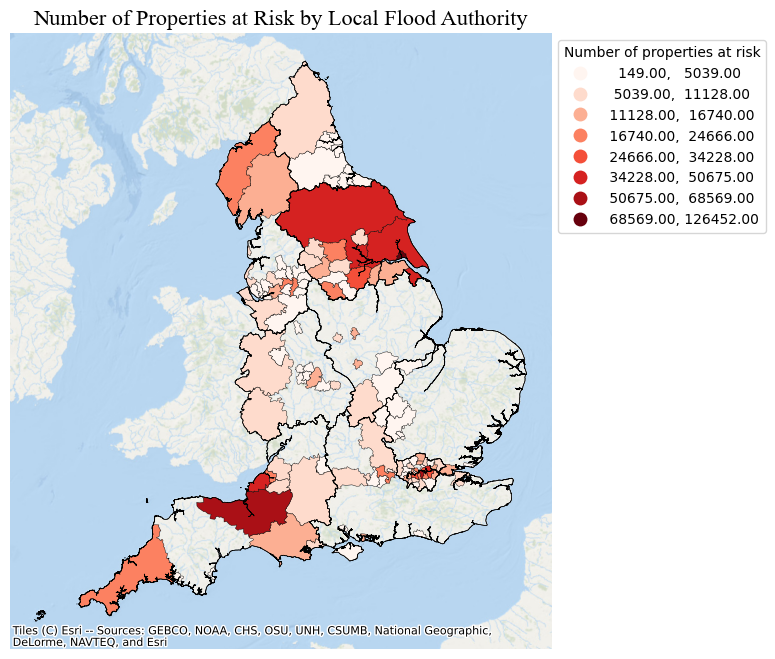

In [ ]:
#Reading Files
#Local Disctrict Authoricties Shapefile ("Cities)
local_districts = gpd.read_file("data/Local_Authority_Districts_May_2024_Boundaries_UK_BUC_3499872675230401373.zip")
#local_districts.head()
#CSV contain the number properties at risk by lead local flood authority
properties_at_risk = pd.read_csv("data/PROPERTIES_AT_RISK_BY_LEAD_LOCAL_FLOOD_AUTHORITY.csv")
uk_regions = gpd.read_file("data/RGN_DEC_24_EN_BFC.zip")
#properties_at_risk.head()

#Data Pre Processing and Cleanning:

#Making sure the properties at resk Local Districts have the same name with the local district geodaframe
properties_at_risk = properties_at_risk.rename(columns ={"AUTHORITY":"LAD24NM"})
local_districts_properties = local_districts.merge(properties_at_risk, on="LAD24NM",how="inner")#,outer would keep both, inner-just with match
local_districts_properties['Total at Risk'] = pd.to_numeric(local_districts_properties['Total at Risk'], errors='coerce') # Confert the collumn to be plotted to numerical to work with the Quantiles


#Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
uk_regions.plot(ax=ax, color = "none", edgecolor = "black", linewidth = 0.4)
local_districts_properties.plot(ax = ax, column = 'Total at Risk', edgecolor="Black", linewidth = 0.3, cmap = 'Reds', scheme="fisher_jenks", legend=True,
    legend_kwds={"title": "Number of properties at risk", "loc": "upper left","bbox_to_anchor": (1, 1),},k=8,)
ax.set_axis_off()
title_parameters = {'fontsize':'16', 'fontname':'Times New Roman'}
ax.set_title("Number of Properties at Risk by Local Flood Authority", **title_parameters) #parameters as above
basemap = ctx.providers.Esri.OceanBasemap#Esri.WorldTopoMap #OpenStreetMap.DE #ctx.providers.CartoDB.Positron
ctx.add_basemap(ax, crs=local_districts_properties.crs.to_string(), source=basemap)
uk_regions.plot(ax=ax, color = "none", edgecolor = "black", linewidth = 0.5)
plt.show()


### Map 2 - Risk of Flooding from Rivers and Sea (Merseyside - Liverpool)

In [ ]:
#Reading the necessary data
local_districts = gpd.read_file("data/Local_Authority_Districts_May_2024_Boundaries_UK_BUC_3499872675230401373.zip")
risks_merseyside = gpd.read_file("data/rofrs_4band_merseyside.zip")
#local_districts.head()
liverpool = local_districts[local_districts["LAD24NM"] == "Liverpool"]

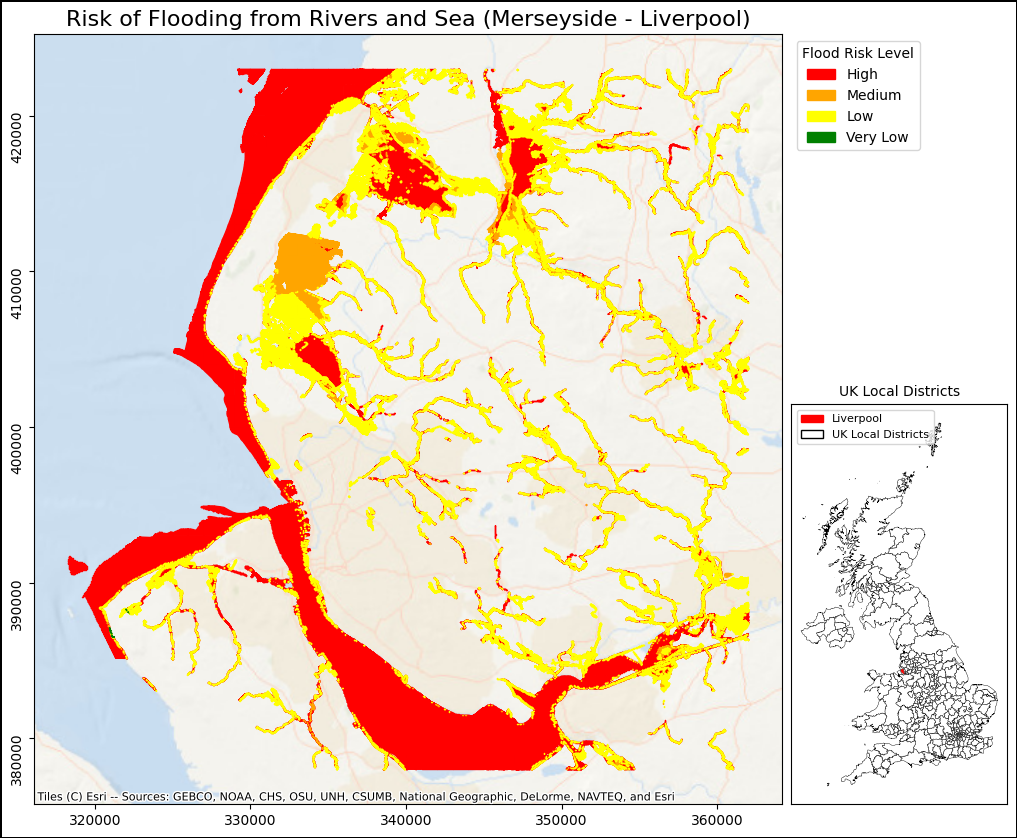

In [ ]:
#Plotting:

#Creating the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#Defining color for each category
colors = {"High": "red","Medium": "orange","Low": "yellow","Very Low": "green"}

# Filtering and plotting each risk category with appropriate color
for risk_level, color in colors.items():
    gdf_filtered = risks_merseyside[risks_merseyside["risk_band"] == risk_level]
    gdf_filtered.plot(ax=ax, color=color, edgecolor=color, label=risk_level)

# Adding Basemap to the plot
basemap = ctx.providers.Esri.OceanBasemap#Esri.WorldTopoMap #OpenStreetMap.DE #ctx.providers.CartoDB.Positron
ctx.add_basemap(ax, crs=risks_merseyside.crs.to_string(), source=basemap)

# Adding Title
ax.set_title("Risk of Flooding from Rivers and Sea (Merseyside - Liverpool)", fontsize=16)

# Adding Leggend
#Creating legend for each category
risks = [mpatches.Patch(color="red", label="High"),mpatches.Patch(color="orange", label="Medium"), mpatches.Patch(color="yellow", label="Low"), mpatches.Patch(color="green", label="Very Low")]
ax.legend(handles=risks, title="Flood Risk Level", loc="upper left", bbox_to_anchor=(1.01, 1))

#Rotate the corridnate at the right side so it does not occupy unecessary space
ax.yaxis.set_tick_params(rotation=90)

# Criating a small map to show were Liverpool is in UK
small_map = fig.add_axes([0.64, 0.11, 0.4, 0.4]) #Adding new grath at hte figure with location outside the main map and size 30X30
local_districts.plot(ax=small_map,color="white", edgecolor="black",linewidth = 0.3,) #Printing first all Local Districts
liverpool.plot(ax=small_map, color="red") # Adding to the small map liverpool in red
small_map.set_title("UK Local Districts", fontsize=10) #Adding title small map
small_map.set_xticks([]) #Removing the ticks marks
small_map.set_yticks([])
#adding Legend to the small map
liverpoo_legend = mpatches.Patch(color='red', label='Liverpool')
districts_legend = mpatches.Patch(edgecolor="black",facecolor="white", label='UK Local Districts')
small_map.legend(handles=[liverpoo_legend,districts_legend], loc="upper left", fontsize=8)

# Adding edges for the main figure
fig.patch.set_linewidth(1)
fig.patch.set_edgecolor('black')

plt.show()

**1 – Properties at Risk by Lead Local Flood Authority**

A CSV obtained from the main dataset Risk of Flooding from Rivers and Sea - Key Summary Information. It has the numbers of people and property within areas at risk of flooding from rivers and the sea. The CSV contains the number of properties at risk by the lead local flood authority. This will allow to show the number of properties at risk to support the points discussed in the introduction.
Source: Environment Agency [6].

**2 - Local Authority Districts (May 2024) Boundaries UK BFE and UK and Regions (December 2024) Boundaries for United Kingdom**

Shapefile with the digital vector boundaries for Local Authority Districts, in the United Kingdom, as of May 2024. As the file containing the properties at risk is a CSV with no spatial data, the administrative boundaries are necessary and were joined with the properties at risk data using the common attribute name of the local authority.
The regions contain the digital vector boundaries for UK regions, only used to help better visually the number of properties at risk of flood per city.
Source: Office for National Statistics [7]

**3 -  Risk of Flooding from Rivers and Sea**

The risk of flooding from Rivers and See (RoFRS) shows the overall likelihood of flood. It is a shapefile containing the flood risk represented on a 2m resolution grid, for the entire UK.
This dataset is key to raising people's awareness of the likelihood of floods in their regions, the entire dataset is only available by request, and I was able to obtain the dataset for the Merseyside county.
By: Environment Agency [8]

## API Functioning (200 words)

**Environment Agency Real Time flood-monitoring API [9]**

Is a REST API that provides access to near real-time (updated every 15 min) flood alerts, flood areas to which the warning applies, measurements of water levels and flows, and information on the station providing those measurements. This work will only retrieve information related to flood warnings.

The API is Open Government Licenced, there is no need for registration and token. REST access is provided via GET, and the requests return data in JSON format. It will allow data to be fetched into the interactive map, using the “request” package in Python. The responses have 3 main elements “context” (ID), “metadata” and “items”. The items contain the list of the warnings.

Each item in the list of warnings contains information, such as time raised, and ID. The ID itself is an endpoint URL to retrieve detailed information for the warning, for each warning found in the response, there has to be another request to retrieve the details.
The response to a specific warning request returns the information that will be used on the map including the flood area with coordinates for the points, as well as the link to request the polygon(s) of the area related to the flood warning.

Retrieving all information involves iterating through each flood warning making subsequent requests and storing the points, polygon and the relevant information.


In [ ]:
# Link for the API to return all the list of lood
api_link = "https://environment.data.gov.uk/flood-monitoring/id/floods"

# Fetch all warnings
api_results = requests.get(api_link).json() #get the results as json file
flood_wornings = api_results.get("items", []) #if empty will fill with an empty list

# Initialising the lists to store the points of flood and the  polygons that the flood apply to
points_data = []
polygons_data = []

In [ ]:
#Checking the results
#import json
#print(json.dumps(api_results, indent=4))  # Pretty print the JSON

In [ ]:
# Iterating through each worning we got from the first reponse
#i=0 #debugging
for worning in flood_wornings:
    worning_id_link = worning.get("@id")  # Get the url for each worning, the "@id", is the flied in the responce that stores de ID

    if worning_id_link: # Check if @ID is not empty
        #Request the details for this flood worning
        #was getting error for some flood id request to not stop the entire resquest
        try:
            worning_results = requests.get(worning_id_link).json()
            worning_details = worning_results.get("items", {}) #
        except Exception as e:
            print(i,"No: Error geering details for", worning_id_link,":", e)
            continue


        # Extract the information required
        flood_area = worning_details.get("floodArea", {}) #floodArea - is a fild in the api which return the dictionation with spatial information of the flood
        lat = flood_area["lat"]
        lon = flood_area["long"]
        polygon_link = flood_area["polygon"]  # the polygon filds a the link for requesting the polygon

        # Creating the point and adding to the list created above
        if lat != None and lon != None:
            points_data.append({
                "description": worning_details.get("description", "No description"),
                "severity": worning_details.get("severity", "Unknown"),
                "message": worning_details.get("message", ""),
                "severityLevel": worning_details.get("severityLevel", 0),
                "geometry": Point(lon, lat) #Creatning with shapely
            })
           # print("Yes",i)
           # i += 1

        # Creating the polygon and adding to the list created above
        if polygon_link: #Check if the link is not empty
            polygon_results = requests.get(polygon_link).json() #Get all the polygons in the link confert to json it might return multiple polygons under features
            polygons_worning = polygon_results.get("features", []) #get the polygons

            for polygons in polygons_worning:
                geometry = polygons.get("geometry",[]) #get the polygon geometry
                if geometry.get("type") == "MultiPolygon": #Some flood risk areas come with multiple polygon
                    coordinates = geometry["coordinates"] #the cordinaes stores the cordinates for the polygon or polygons

                    list_of_sub_polygon = []
                    for polygon in coordinates:
                        list_of_sub_polygon.append(Polygon(polygon[0]))
                    mult_polygon = MultiPolygon(list_of_sub_polygon)

                    ##mult_polygon = MultiPolygon([Polygon(poly[0]) for poly in coordinates])

                    polygons_data.append({
                        "description": worning_details.get("description", "No description"),
                        "severity": worning_details.get("severity", "Not Given"),
                        "message": worning_details.get("message", ""),
                        "severityLevel": worning_details.get("severityLevel", 0),
                        "geometry": mult_polygon })
                elif geometry.get("type") == "Polygon": # If is a single polygon the URL
                            coordinates = geometry.get("coordinates", [])
                            polygon = Polygon(coordinates[0])
                            #Just add the polygon no need to iterate
                            polygons_data.append({
                                "description": worning_details.get("description", "No description"),
                                "severity": worning_details.get("severity", "Unknown"),
                                "severityLevel": worning_details.get("severityLevel", 0),
                                "message": worning_details.get("message", ""),
                                "geometry": polygon
                            })


# Convert the points and the polygon to geodataframe
gdf_points = gpd.GeoDataFrame(points_data, geometry="geometry", crs="EPSG:4326")
gdf_polygons = gpd.GeoDataFrame(polygons_data, geometry="geometry", crs="EPSG:4326")

#Ckecking results
#print(gdf_points.head())
#print(gdf_polygons.head())

## Interactive Map Functioning and Design Choices (200 words)

The final interactive map allows users to visualise all current flood warnings. At low zoom levels, the warnings are clustered within a pentagon, with the label representing the number of warnings in that cluster, and the colour of the cluster given by the highest severity flood alert in the cluster. As the user zooms in, the map shows each alert with a warning pin. When the pin is clicked it shows information further information. The map also shows the area that each flood warning applies to, the area is by default dashed, and when the mouse is hovered at the area where the flood warning applies it is highlighted.

**Design choices**

The basemap was selected because it is light with little labels allowing focus on the warnings. Point cluster to better organise the information and avoid maps with overloaded with points. The colours (dark red, red, orange, “blue”), represent danger. The pentagon cluster instead of the default circle, gives more sense of danger.
The plugins I Included: Geocoder, and Locate provide functionalities mainly for those with difficulty identifying their location and Layer toggle group control allowing users to focus only on the point or areas.
The aim was to create a simple map so as not to overwhelm the user due to the importance of the subject and decided only to include the most relevant information, for example, information such as the time raised, not included, as if the flood warning is active it does not matter when it was raised.


In [ ]:
# Define map bounds
uk_bounds = [[50.5, -7], [59, 2]]

# Create the Folium map
map = folium.Map(tiles="CartoDB positron", zoom_start=6, world_copy_jump=True)
map.fit_bounds(uk_bounds)



# Create the polygon subgroup to allow the user select or remove
group_polygons = folium.FeatureGroup(name="Flood Warning Areas", show=True)

# It would have been nice to allow the hide the points at high zoom level and show the polygon and vice versa
# Since was not able to do that, use the folion functionality to change the style when the user huver with mouse

flood_warnin_areas = folium.GeoJson(
    gdf_polygons,
    style_function=lambda x: {
        'fillColor': 'transparent',
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5' #Dash line 5 points solid and 5 nothing
    },
    highlight_function=lambda x: {
        'fillColor': "grey",
        'color': 'black',
        'weight': 2,
        'dashArray': '0, 0',
        'fillOpacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=["severity"], aliases=["Zone of flood with severity: "]) #Show the information of severity when the mouse is hovered
).add_to(group_polygons)

map.add_child(group_polygons) #add pthe poligons to map

#Adding the point layers
#Also create a group for the points
group_points = folium.FeatureGroup(name="Flood Warning Points", show=True)

# List of severity level with its corresponding colours
severity_colors = {0: "gray", 1: "darkred", 2: "red", 3: "orange", 4: "blue"}


#The point layers will be grouped as the user zooms
#The cluster need to have the color of the highest severity and the shape of cluster should pe pentagon
# Since there is no function in folium to achive that will achive that with javascript
icon_create_function = """
function(clustar_points) {
    var points = clustar_points.getAllChildMarkers(); //get each point
    var lest_severity = 4;  // Set initially to lowest severity

    // Loop the find the most severe worning in the cluster
    points.forEach(function(point) {
        var severity = point.options.icon.options.markerSeverity;
        if (severity < lest_severity) {
            lest_severity = severity;
        }
    });

    var severity_colors = {0: 'gray', 1: 'darkred', 2: 'red', 3: 'orange', 4: 'blue'};
    var group_points_color = severity_colors[lest_severity] || 'gray';

    // divIcon Leaflet's method to create an HTML-based icon

    return L.divIcon({
        html: '<div style="background-color:' + group_points_color + '; color: white; width: 40px; height: 40px; \
               display: flex; align-items: center; justify-content: center; border-radius: 10%; \
               clip-path: polygon(50% 0%, 100% 38%, 82% 100%, 18% 100%, 0% 38%);">' +
               clustar_points.getChildCount() + '</div>',
        className: 'custom-cluster',
        iconSize: [40, 40]
    });
}
"""


# Creat cluster with custom icon function, add the layer to the group, to allow turn on and off
marker_cluster = MarkerCluster(icon_create_function=icon_create_function).add_to(group_points)

# Add Points with severity info
for idx, row in gdf_points.iterrows():
    if hasattr(row.geometry, "x") and hasattr(row.geometry, "y"): #Check if the geometry is vallid
        lat, lon = row.geometry.y, row.geometry.x
        severity = row.get('severity', 'Unknown')
        severityL = row.get('severityLevel', 0)
        color = severity_colors[severityL]

        #Creating the content of popup using html
        popup_html = f"""
        <div style="width: 200px; white-space: normal;">
            <b>Severity:</b> {severity}<br>
            <b>Details:</b> {row.get('description', 'No Description')}
        </div>
        """

        # Create the marker and add to the Cluster
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color=color, icon='exclamation-sign', markerSeverity=severityL),
            popup=Popup(popup_html, max_width=200)
        ).add_to(marker_cluster)

#Add to map
map.add_child(group_points)

#Add Geocode Plugin to allow user search for their location
Geocoder().add_to(map)

# Add the layer controlss
GroupedLayerControl(
    groups={'Flood Data': [group_polygons, group_points]},
    exclusive_groups=False, #Allow user to sellect multiple layes
    collapsed=True, #Hide the layers control when not needed
).add_to(map)

# Plugin to show user current location
LocateControl().add_to(map)

# Define the legend's HTML
#1:"darkred", 2: "red", 3: "orange", 4: "blue"}
legend_html = '''
<div style="position: fixed;
     bottom: 15px; left: 15px; width: 200px; height: 150px;
     border:2px solid grey; z-index:9999; font-size:11px;
     background-color:white; opacity: 0.85;">
     &nbsp; <b>Severity:</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:darkred"></i>&nbsp; Severe Flooding, Danger to Life. Circle<br>
     &nbsp; <i class="fa fa-circle" style="color:red"></i>&nbsp;Flooding is Expected, Immediate Action Required.<br>
     &nbsp; <i class="fa fa-circle" style="color:orange"></i>&nbsp;Flooding is Possible, Be Prepared. Circle<br>
     &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp;The warning is no longer in force<br>
</div>
'''

# Add the legend to the map
map.get_root().html.add_child(folium.Element(legend_html))

map

## Conlcusion (100 words)

All in all, geo-visualisation can be used to raise awareness of flood risk, which is beneficial for flood preparedness, and improving flood resilience. As stated by Wheater [2] extreme weather events will always occur, warnings and preparation are the only solutions. Through static maps, it was possible to create figures showing the number of properties at risk of flood per local authority as well as illustrating the risk of flood in certain areas, images which improve the overall awareness of people.

Flood warnings can be displayed on interactive maps, simple to understand and easy to use, making sure people can prepare for possible flood events, and reducing the impacts of floods as reported in the introduction.
The research shows that floods in the UK will increase [5], however, as demonstrated the possible flood events can be communicated using the language of maps and the impacts can be mitigated or avoided.

Future work would be creating an application to give more interactivity, such as filtering the number of floods per city, and other functionalities.


## References

1 - What are floods and why they’re happening in the UK (no date) British Red Cross. Available at: https://www.redcross.org.uk/stories/disasters-and-emergencies/uk/what-are-floods (Accessed: 01 March 2025).
2 - Wheater, H.S. (2006) ‘Flood hazard and management: A UK perspective’, Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 364(1845), pp. 2135–2145. doi:10.1098/rsta.2006.1817.

3 - Rubinato, M. et al. (2019) ‘Urban and river flooding: Comparison of flood risk management approaches in the UK and China and an assessment of future knowledge needs’, Water Science and Engineering, 12(4), pp. 274–283. doi:10.1016/j.wse.2019.12.004.

4 - Miller, J.D. and Hutchins, M. (2017) ‘The impacts of urbanisation and climate change on urban flooding and urban water quality: A review of the evidence concerning the United Kingdom’, Journal of Hydrology: Regional Studies, 12, pp. 345–362. doi:10.1016/j.ejrh.2017.06.006.

5 - Curtis (2024) Flooding in the UK: Past, present, and future, Morgan Clark. Available at: https://www.morganclark.co.uk/about-us/blog/uk-flood-statistics-facts-about-flooding/ (Accessed: 06 March 2025).

***Datasets***

6 – https://www.data.gov.uk/dataset/f2ea0779-f820-4101-83a7-9e62ad6e8827/risk-of-flooding-from-rivers-and-sea-key-summary-information1#licence-info

7 – https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2024-boundaries-uk-bfe-2/about

8 - https://environment.data.gov.uk/explore/96ab4342-82c1-4095-87f1-0082e8d84ef1?download=true

Data and Notebook available:
https://github.com/atanilson/envs456_assignment
